In [67]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import itertools

In [88]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def generate_data(num, func):
    time_points = np.random.uniform(-5,5,num) 
    noise = np.random.normal(size=num)
    data_points = func(time_points) * 25 + noise
    return pd.DataFrame(zip(time_points, data_points) , columns=["time", "values"])

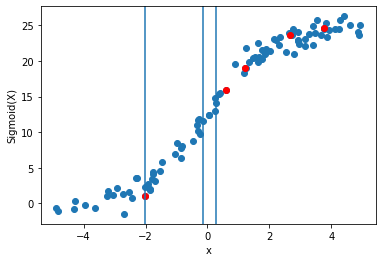

In [141]:
data = generate_data(100, sigmoid)
observed = data.sample(5)
unobserved = data["time"].sample(3)
plt.scatter(data["time"], data["values"]) 
plt.scatter(observed["time"], observed["values"], c="red") 
for xc in unobserved.values:
    plt.axvline(x=xc)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 


\begin{align}
    K &= \begin{bmatrix}
    k(x_1,x_1)&\cdots &k(x_n,x_1) \\
    \vdots & \ddots & \vdots\\
    k(x_1,x_n)&\cdots &k(x_n,x_n)
    \end{bmatrix} & K_* &= [k(x_*,x_1), \cdots, k(x_*,x_n)]\\
    y_* &= K_*K^{-1}Y &\sigma_*^2 &= K_{**} - K_* K^{-1} K_*^T
\end{align}

In [142]:
def vectorized_rbf_kernel(a,b, h_sigma = 1):
    a_squared = np.square(np.absolute(a))
    b_squared = np.square(np.absolute(b))
    inner_product = (2 * a * b)
    squared_diff = a_squared + b_squared - inner_product
    denominator = 2*np.square(h_sigma)
    return np.exp(-1*squared_diff/denominator)

def create_covariance_matrix(a,b):
    shape = [len(a), len(b)] 
    all_covariances = [vectorized_rbf_kernel(x,y) for x,y in itertools.product(a,b)]
    container = np.array(all_covariances).reshape(shape)
    return container

In [143]:
K = create_covariance_matrix(observed["time"], observed["time"])
K_star = create_covariance_matrix(unobserved, observed["time"])
K_star_star = create_covariance_matrix(unobserved, unobserved)

In [144]:
y_star = K_star @ np.linalg.inv(K) @ observed["values"]
sigma_star = K_star_star - K_star @ np.linalg.inv(K) @ K_star.T

In [145]:
y_star

array([ 1.02943177,  9.33551927, 13.28257656])

In [146]:
sigma_star

array([[ 9.66568045e-05, -2.12946247e-03, -5.61406926e-04],
       [-2.12946247e-03,  2.16888092e-01,  7.58635061e-02],
       [-5.61406926e-04,  7.58635061e-02,  2.82346425e-02]])

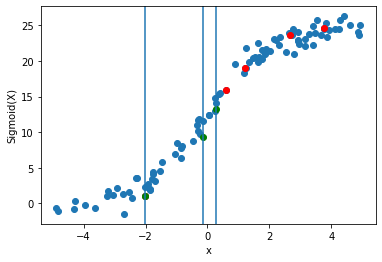

In [147]:
plt.scatter(data["time"], data["values"]) 
plt.scatter(observed["time"], observed["values"], c="red") 
plt.scatter(unobserved, y_star, c="green") 
for xc in unobserved.values:
    plt.axvline(x=xc)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 